In [209]:
 !pip install -q keras

In [2]:
import keras

Using TensorFlow backend.


In [4]:
import os 
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [5]:

dir = 'C:\\Users\\Nasik\\Desktop\\Semester 6\\FYP\\dataset-resized'

In [6]:
categories = ['cardboard','glass','metal','paper','plastic','trash']

In [7]:
data = [ ]

In [8]:
for category in categories:
    path = os.path.join(dir,category)
    label=categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        trash_img = cv2.imread(imgpath,0)
        try:
            trash_img = cv2.resize(trash_img,(50,50))
            image=np.array(trash_img).flatten()
            data.append([image,label])
        except Exception as e:
            pass
print(len(data))    


2527


In [9]:
pick_in= open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()


In [10]:
pick_in= open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()


In [11]:

random.shuffle(data)
features = []
labels=[]


In [12]:
for feature, label in data:
    features.append(feature)
    labels.append(label)


In [20]:
xtrain, xtest, ytrain,ytest = train_test_split (features, labels, train_size=0.80, test_size=0.20)


In [14]:
model= SVC(C=1,kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
pick= open('model1.sav','wb')
pickle.dump(model,pick)
pick.close()


In [19]:
pick= open('model1.sav','rb')
model=pickle.load(pick)
pick.close()


Accuracy :  0.8853754940711462
Prediction is : trash


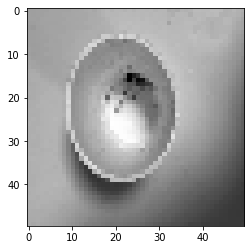

In [21]:
random.shuffle(data)
prediction= model.predict(xtest)
accuracy = model.score (xtest, ytest)

categories = ['cardboard','glass','metal','paper','plastic','trash']

print('Accuracy : ', accuracy)
print('Prediction is :',categories[prediction[0]])



trash=xtest[0].reshape(50,50)
plt.imshow(trash, cmap='gray')
plt.show()

  


In [208]:
#CONFUSION MATRIX
from sklearn.svm import SVC
predictions = model.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))

[[  0  91   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0  81   0   0   0   0]
 [  0 113   0   0   0   0]
 [  0  97   0   0   0   0]
 [  0  24   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.20      1.00      0.33       100
           2       0.00      0.00      0.00        81
           3       0.00      0.00      0.00       113
           4       0.00      0.00      0.00        97
           5       0.00      0.00      0.00        24

    accuracy                           0.20       506
   macro avg       0.03      0.17      0.06       506
weighted avg       0.04      0.20      0.07       506



C:\Users\Nasik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
#GRID SEARCH
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=  16.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=  16.5s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  16.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  16.9s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  16.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  16.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  16.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  16.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 22.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [99]:

grid_predictions = grid.predict(xtest)
print(confusion_matrix(ytest,grid_predictions))
print(classification_report(ytest, predictions))

[[  0   0   0  77   0   0]
 [  0   0   0 113   0   0]
 [  0   0   0  84   0   0]
 [  0   0   0 118   0   0]
 [  0   0   0  88   0   0]
 [  0   0   0  26   0   0]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.85      0.87      0.86       113
           2       0.91      0.88      0.90        84
           3       0.95      0.88      0.92       118
           4       0.85      0.92      0.89        88
           5       0.88      0.81      0.84        26

    accuracy                           0.88       506
   macro avg       0.88      0.87      0.88       506
weighted avg       0.88      0.88      0.88       506



In [207]:
grid.best_params_

NameError: name 'grid' is not defined

In [102]:
"""we can see that the results for precision, recall,f1-score,support,weighted avg
macro avg,accuracy all the results are exactly same for the before and after state
of the grid search. It took around 22 mins to execute the grid search."""

'we can see that the results for precision, recall,f1-score,support,weighted avg\nmacro avg,accuracy all the results are exactly same for the before and after state\nof the grid search. It took around 22 mins to execute the grid search.'

In [125]:
print (type(data))

<class 'list'>


In [136]:
from sklearn.metrics import classification_report, confusion_matrix

In [140]:
ytest = model.predict(xtest)
prediction

array([1, 0, 5, 1, 2, 1, 3, 1, 0, 3, 2, 3, 4, 0, 3, 3, 2, 1, 3, 4, 4, 4,
       1, 1, 1, 3, 4, 2, 4, 1, 2, 2, 5, 1, 1, 3, 3, 1, 2, 3, 3, 0, 1, 2,
       3, 4, 3, 5, 1, 0, 4, 2, 5, 3, 4, 3, 1, 2, 1, 1, 1, 4, 0, 2, 2, 3,
       1, 0, 4, 1, 2, 3, 0, 1, 2, 1, 2, 1, 0, 3, 0, 0, 4, 4, 2, 4, 1, 0,
       2, 0, 0, 0, 3, 0, 1, 4, 4, 4, 3, 2, 1, 3, 0, 0, 4, 3, 1, 2, 3, 1,
       5, 3, 3, 4, 1, 3, 3, 3, 3, 1, 4, 5, 3, 4, 1, 4, 1, 2, 0, 4, 5, 0,
       1, 1, 1, 2, 2, 3, 1, 2, 1, 1, 0, 0, 2, 3, 5, 0, 5, 1, 1, 4, 1, 0,
       2, 3, 2, 1, 0, 4, 2, 2, 1, 4, 3, 0, 2, 2, 1, 3, 1, 2, 1, 1, 1, 5,
       2, 2, 4, 2, 4, 4, 0, 0, 4, 0, 3, 4, 4, 4, 2, 3, 1, 4, 2, 4, 1, 2,
       3, 3, 4, 0, 3, 0, 1, 0, 2, 4, 2, 2, 1, 3, 0, 5, 1, 4, 3, 0, 4, 1,
       3, 3, 4, 2, 1, 1, 0, 0, 0, 1, 3, 0, 3, 4, 5, 1, 4, 2, 1, 4, 1, 0,
       2, 0, 1, 4, 4, 0, 3, 1, 4, 3, 2, 1, 2, 4, 1, 3, 4, 4, 2, 1, 3, 3,
       4, 2, 1, 1, 2, 4, 0, 2, 4, 2, 1, 0, 4, 5, 3, 4, 3, 2, 1, 0, 0, 4,
       0, 0, 4, 2, 1, 4, 4, 4, 4, 1, 1, 0, 5, 1, 1,

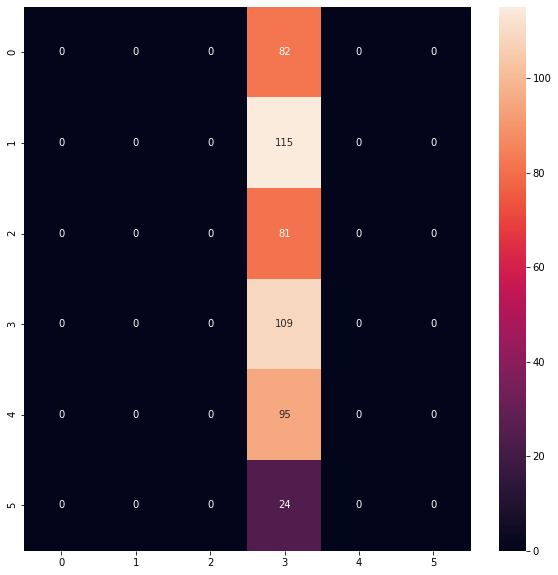

In [154]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,grid_predictions)
sns.heatmap(cm, annot=True, fmt="d")

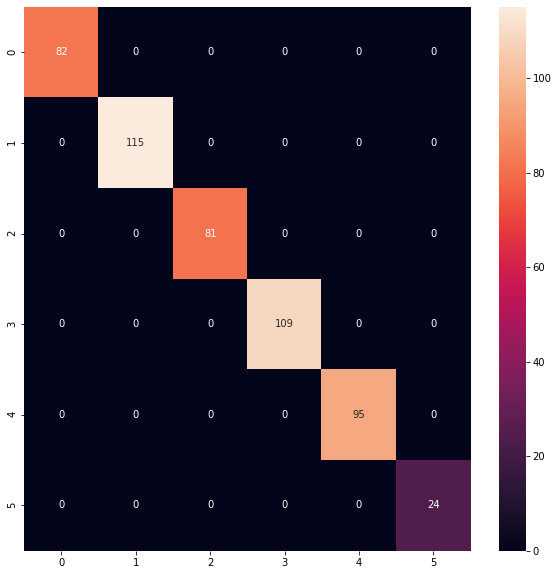

In [153]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,prediction)
sns.heatmap(cm, annot=True, fmt="d")

In [174]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[0.1, 0.5, 1, 5, 10]}

clf = GridSearchCV(SVC(), parameters)
clf.fit(xtrain, ytrain)
print('score',clf.score(xtest, ytest))
print(clf.best_params_)

score 0.5375494071146245
{'C': 10, 'kernel': 'rbf'}
Wall time: 19min 43s


In [177]:
"""   score 0.5375494071146245
{'C': 10, 'kernel': 'rbf'}
Wall time: 19min 43s   """

"   score 0.5375494071146245\n{'C': 10, 'kernel': 'rbf'}\nWall time: 19min 43s   "

In [195]:
xtrain, xtest, ytrain,ytest = train_test_split (features, labels, train_size=0.80, test_size=0.20)


In [186]:
model= SVC(C=10,kernel='rbf', gamma='auto')
model.fit(xtrain, ytrain)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [187]:
#passing the latest recommended attributes

In [188]:
pick= open('model5.sav','wb')
pickle.dump(model,pick)
pick.close()


In [196]:
pick= open('model5.sav','rb')
model=pickle.load(pick)
pick.close()

Accuracy :  0.849802371541502
Prediction is : paper


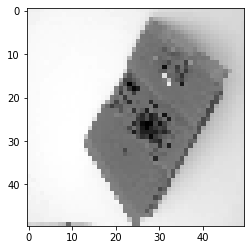

In [197]:
random.shuffle(data)
prediction= model.predict(xtest)
accuracy = model.score (xtest, ytest)

categories = ['cardboard','glass','metal','paper','plastic','trash']

print('Accuracy : ', accuracy)
print('Prediction is :',categories[prediction[0]])



trash=xtest[0].reshape(50,50)
plt.imshow(trash, cmap='gray')
plt.show()

  

In [198]:
#CONFUSION MATRIX
from sklearn.svm import SVC
predictions = model.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest, predictions))
print(classification_report(ytest, predictions))

[[ 56   0   0  16   0   0]
 [  0  89   0  21   0   0]
 [  0   0  65  16   0   0]
 [  0   0   0 112   0   0]
 [  0   1   0  16  79   0]
 [  0   0   0   6   0  29]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        72
           1       0.99      0.81      0.89       110
           2       1.00      0.80      0.89        81
           3       0.60      1.00      0.75       112
           4       1.00      0.82      0.90        96
           5       1.00      0.83      0.91        35

    accuracy                           0.85       506
   macro avg       0.93      0.84      0.87       506
weighted avg       0.91      0.85      0.86       506



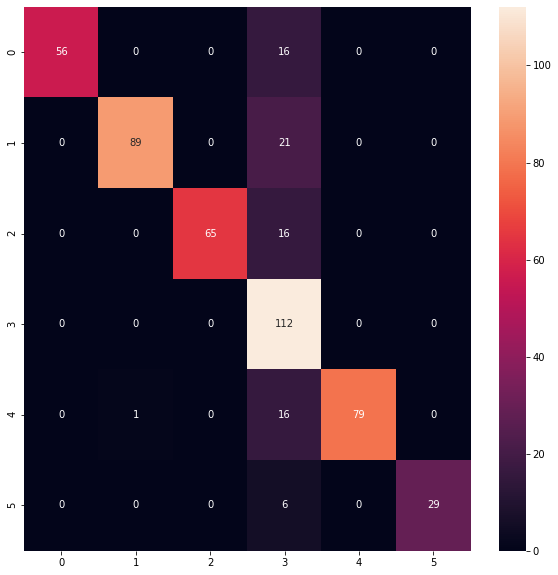

In [199]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,prediction)
sns.heatmap(cm, annot=True, fmt="d")

In [200]:
#here we can see by changing the attributes, we got a different result for accuracy as well as other parameters

In [24]:

# determining outliers using Z scores where mean is  '0' and Standard deviation is '1'

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(ytest))
print(z)

[1.84691419 1.50990542 0.16717758 0.8385415  0.50418634 1.17555027
 0.50418634 0.50418634 1.50990542 0.16717758 0.50418634 0.16717758
 0.16717758 0.50418634 0.16717758 0.8385415  1.50990542 1.50990542
 0.16717758 1.84691419 0.16717758 0.50418634 1.17555027 1.84691419
 0.8385415  0.50418634 0.50418634 0.8385415  1.50990542 1.84691419
 1.50990542 0.50418634 1.17555027 1.17555027 0.50418634 1.84691419
 0.50418634 0.8385415  1.84691419 1.84691419 1.84691419 0.50418634
 0.8385415  1.84691419 0.50418634 0.50418634 0.8385415  0.50418634
 1.50990542 1.50990542 0.8385415  1.17555027 1.84691419 0.8385415
 0.50418634 1.50990542 1.17555027 0.8385415  0.50418634 1.17555027
 1.17555027 0.8385415  0.50418634 0.8385415  0.8385415  0.50418634
 0.8385415  1.17555027 0.16717758 1.50990542 0.8385415  0.16717758
 0.50418634 0.8385415  1.50990542 0.50418634 1.17555027 1.50990542
 1.17555027 0.50418634 0.16717758 0.16717758 0.8385415  1.50990542
 0.50418634 1.17555027 0.8385415  0.50418634 0.16717758 1.17555

In [161]:
# defining threshold as 3 to identify any outliers above 3
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [25]:
#trying with random forrest classifier

In [126]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)


In [127]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)
classifier.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

Accuracy :  0.1600790513833992
Prediction is : metal


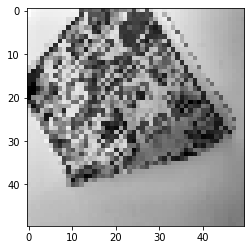

In [125]:
random.shuffle(data)
prediction= classifier.predict(xtest)
accuracy = classifier.score (xtest, ytest)

categories = ['cardboard','glass','metal','paper','plastic','trash']

print('Accuracy : ', accuracy)
print('Prediction is :',categories[prediction[0]])



trash=xtest[0].reshape(50,50)
plt.imshow(trash, cmap='gray')
plt.show()


In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [187]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [188]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)
clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [189]:
y_predict = clf.predict(xtest)

In [190]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(ytest, y_predict)
accuracy_score=accuracy_score(ytest,y_predict)
from sklearn.model_selection import cross_val_score

cross_valid=cross_val_score(clf,features,labels,cv=10,scoring='accuracy').mean()

              precision    recall  f1-score   support

           0       0.62      0.59      0.61        91
           1       0.44      0.54      0.48       100
           2       0.45      0.38      0.41        81
           3       0.64      0.67      0.66       113
           4       0.58      0.54      0.56        97
           5       0.61      0.46      0.52        24

    accuracy                           0.55       506
   macro avg       0.56      0.53      0.54       506
weighted avg       0.55      0.55      0.55       506

Cross Validation :  0.5671074094987139


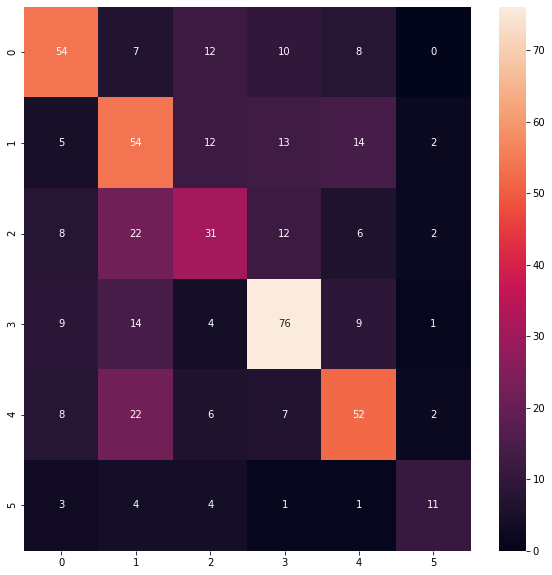

In [191]:
#CONFUSION MATRIX
from sklearn.svm import SVC
import seaborn as sns
y_predict = clf.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

print(classification_report(ytest, y_predict))
print("Cross Validation : ",cross_valid)



plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,y_predict)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#the above is without hyperparameter

In [179]:
#the below is using the random search 

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [131]:
from scipy.stats import randint

In [132]:
est = RandomForestClassifier(n_jobs=-1)

In [133]:
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
             
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               
              }

In [134]:
def hypertuning_rscv(est, p_distr, nbr_iter,features,labels):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(features,labels)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [135]:

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, features, labels)

In [139]:
rf_parameters


{'n_estimators': 200,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': False}

In [137]:
rf_ht_score

0.6592936225498502

In [180]:
claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=200,bootstrap= False,criterion='gini',max_depth=None)

In [182]:
from sklearn.model_selection import cross_val_score


cross_val=cross_val_score(claasifier,features,labels,cv=10,scoring='accuracy').max()

In [183]:
print("Cross Validation : ",cross_val)

Cross Validation :  0.7063492063492064


In [146]:
rf_ht_score #this is before fitting into the Random forrest classifier

0.6592936225498502

In [184]:
y_pred = classifier.predict(xtest)

              precision    recall  f1-score   support

           0       0.62      0.59      0.61        91
           1       0.44      0.54      0.48       100
           2       0.45      0.38      0.41        81
           3       0.64      0.67      0.66       113
           4       0.58      0.54      0.56        97
           5       0.61      0.46      0.52        24

    accuracy                           0.55       506
   macro avg       0.56      0.53      0.54       506
weighted avg       0.55      0.55      0.55       506

Cross Validation :  0.7063492063492064


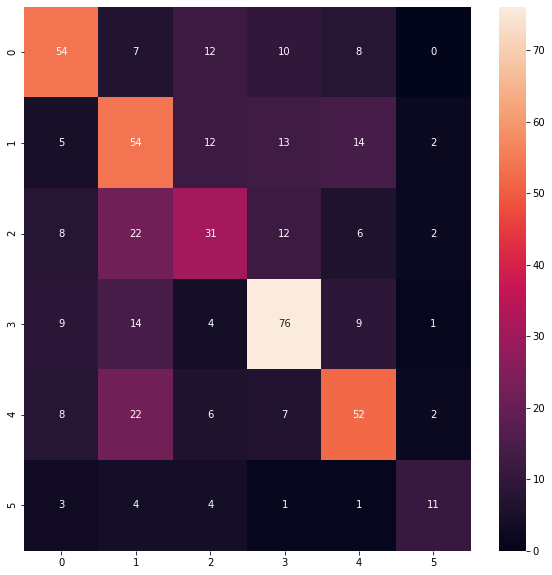

In [185]:
#CONFUSION MATRIX
from sklearn.svm import SVC
import seaborn as sns
y_pred = classifier.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

print(classification_report(ytest, y_pred))
print("Cross Validation : ",cross_val)



plt.figure(figsize=(10,10))
cm = confusion_matrix(ytest,y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#improved the cross validation result afer tuning 

In [206]:
#tried to Visualize the Data with Matplotlib.
#no output cause the dataset is not linearly seperable

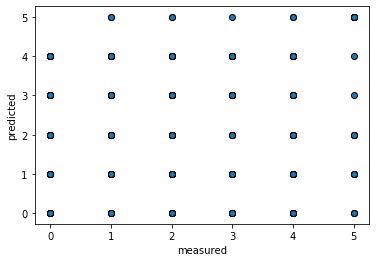

In [205]:
fig,ax=plt.subplots()
ax.scatter(ytest,y_pred, edgecolors=(0,0,0))
ax.plot([labels, labels],[labels, labels],'k--',lw=8)

ax.set_xlabel("measured")
ax.set_ylabel("predicted")
plt.show()